In [1]:
import yfinance as yf
import pandas as pd
import sweetviz as sv
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1.	Analiza la evolución de los datos:

In [2]:
# Definir los tickers y el periodo de tiempo de retorno
tickers = ["AMZN", "AAPL", "TSLA", "META", "MSFT"]
start_date = "2021-01-01"
end_date = "2024-02-01"

# Obtener los datos históricos de los tickers
data = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
data.head()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,META,MSFT,TSLA
Date,,,,,
2021-01-04,126.830070,159.331497,268.654968,211.224289,243.256668
2021-01-05,128.398193,160.925507,270.682800,211.428085,245.036667
2021-01-06,124.076088,156.919006,263.030914,205.945862,251.993332
2021-01-07,128.309982,158.108002,268.455170,211.806503,272.013336
2021-01-08,129.417465,159.134995,267.286407,213.097015,293.339996


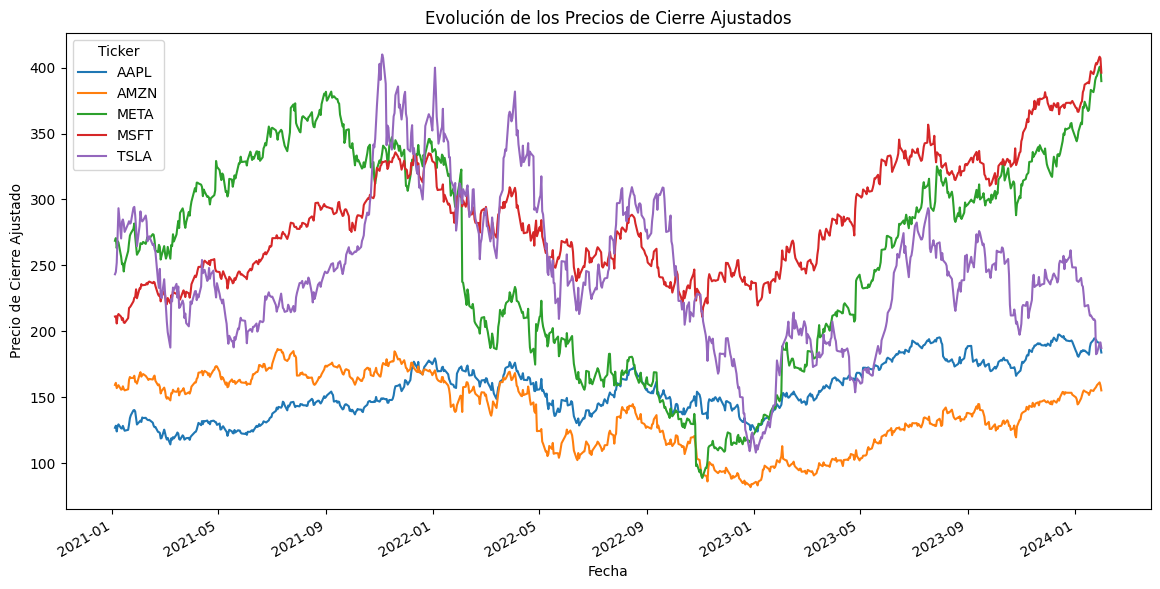

In [3]:
data.plot(figsize=(14, 7))
plt.title('Evolución de los Precios de Cierre Ajustados')
plt.ylabel('Precio de Cierre Ajustado')
plt.xlabel('Fecha')
plt.legend(title='Ticker')
plt.show()

In [4]:
print(data.describe())

Ticker        AAPL        AMZN        META        MSFT        TSLA
count   774.000000  774.000000  774.000000  774.000000  774.000000
mean    155.328509  138.698511  257.310001  284.443793  246.076809
std      20.662072   27.212948   79.664535   43.929686   55.151301
min     114.210655   81.820000   88.815765  205.945862  108.099998
25%     140.345200  115.401375  186.522106  247.555931  210.007496
50%     152.195824  142.435005  273.634674  279.698730  240.474998
75%     172.349945  163.153381  327.170380  320.037910  277.849998
max     197.589523  186.570496  400.594940  408.227386  409.970001


## 2.	¿Hay correlación entre los stocks?

In [5]:
# Calcular los retornos diarios
returns = data.pct_change()

# Calcular la matriz de correlación de los retornos
correlation_matrix = returns.corr()
print(correlation_matrix)

Ticker      AAPL      AMZN      META      MSFT      TSLA
Ticker                                                  
AAPL    1.000000  0.607974  0.551687  0.720267  0.535235
AMZN    0.607974  1.000000  0.590752  0.669459  0.456775
META    0.551687  0.590752  1.000000  0.584624  0.355462
MSFT    0.720267  0.669459  0.584624  1.000000  0.442584
TSLA    0.535235  0.456775  0.355462  0.442584  1.000000


In [6]:
# Generar un reporte usando Sweetviz
report = sv.analyze(data)
report.show_html('../reports/Stock_Report.html')  # Salida en HTML

                                             |                                                                …

Report ../reports/Stock_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [7]:
print(returns.head())

Ticker          AAPL      AMZN      META      MSFT      TSLA
Date                                                        
2021-01-04       NaN       NaN       NaN       NaN       NaN
2021-01-05  0.012364  0.010004  0.007548  0.000965  0.007317
2021-01-06 -0.033662 -0.024897 -0.028269 -0.025929  0.028390
2021-01-07  0.034123  0.007577  0.020622  0.028457  0.079447
2021-01-08  0.008631  0.006496 -0.004354  0.006093  0.078403


In [8]:
returns.dtypes

Ticker
AAPL    float64
AMZN    float64
META    float64
MSFT    float64
TSLA    float64
dtype: object

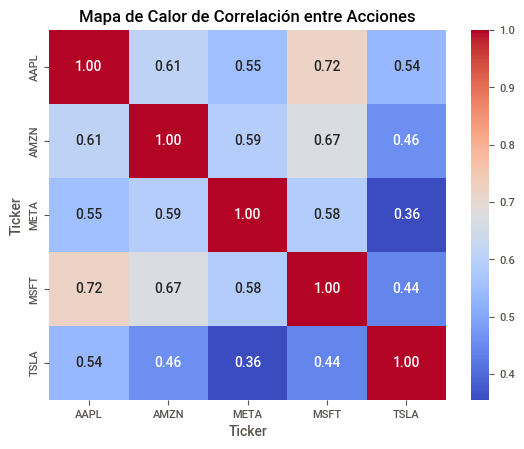

In [9]:
# Asumiendo que 'correlation_matrix' es tu DataFrame de Pandas
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación entre Acciones')
plt.show()


In [10]:
adj_amz = data['AMZN']
adj_amz

Date
2021-01-04    159.331497
2021-01-05    160.925507
2021-01-06    156.919006
2021-01-07    158.108002
2021-01-08    159.134995
                 ...    
2024-01-25    157.750000
2024-01-26    159.119995
2024-01-29    161.259995
2024-01-30    159.000000
2024-01-31    155.199997
Name: AMZN, Length: 774, dtype: float64

## 4.	A partir de este momento seleccionamos la columna de Amazon. Crea una columna llamada Return calculada con la función pct_change() a partir de la columna Adj_Close(). 

In [11]:
# Calcular los retornos diarios solo de AMZ
returns_amz = data['AMZN'].pct_change()
returns_amz.head()

Date
2021-01-04         NaN
2021-01-05    0.010004
2021-01-06   -0.024897
2021-01-07    0.007577
2021-01-08    0.006496
Name: AMZN, dtype: float64

In [12]:
# Comprobando valores faltantes en el conjunto de datos
missing_values = returns_amz.isnull().sum()
missing_values

1

In [13]:
returns_amz

Date
2021-01-04         NaN
2021-01-05    0.010004
2021-01-06   -0.024897
2021-01-07    0.007577
2021-01-08    0.006496
                ...   
2024-01-25    0.005610
2024-01-26    0.008685
2024-01-29    0.013449
2024-01-30   -0.014015
2024-01-31   -0.023899
Name: AMZN, Length: 774, dtype: float64

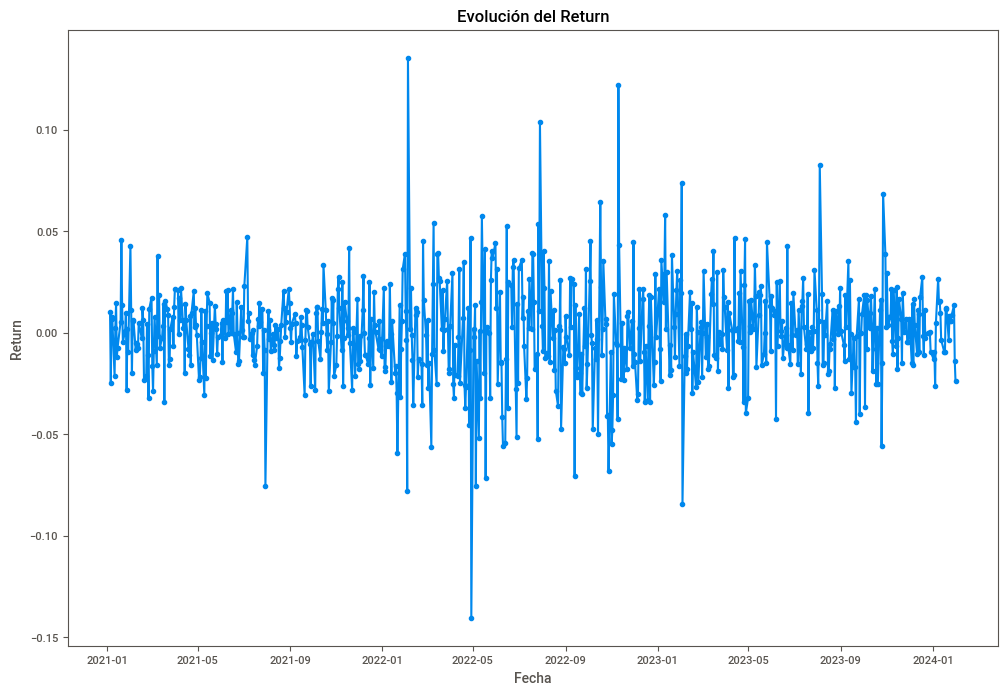

In [14]:
# Convertir los datos a un DataFrame
df_amz = pd.DataFrame(list(returns_amz.items()), columns=['Date', 'Return'])
df_amz['Date'] = pd.to_datetime(df_amz['Date'])                               
                            
# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos
ax.plot(df_amz['Date'], df_amz['Return'], marker='o')

# Añadir título y etiquetas
ax.set_title('Evolución del Return')
ax.set_xlabel('Fecha')
ax.set_ylabel('Return')

# Añadir anotación en un punto específico
ax.annotate('Punto destacado', xy=(pd.to_datetime('2021-01-06'), 156.919006),
            xytext=(pd.to_datetime('2021-01-07'), 117.5),
            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Mostrar el gráfico
plt.show()

In [15]:
df_amz.Return.describe()

count    773.000000
mean       0.000238
std        0.023342
min       -0.140494
25%       -0.012566
50%        0.000313
75%        0.012696
max        0.135359
Name: Return, dtype: float64

## 5.	Argumenta si las series temporales son estacionarias o no con los datos de la columna Return. 

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
df_amz.dtypes

Date      datetime64[ns]
Return           float64
dtype: object

In [18]:
# Realizar la prueba de Dickey-Fuller aumentada
df_amz_clean = df_amz.dropna()
df_amz_clean['Return'].dropna(inplace=True)

result = adfuller(df_amz_clean['Return'])

# Imprimir los resultados de la prueba
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -27.77390308652727
p-value: 0.0
Critical Values:
   1%: -3.4388489336836003
   5%: -2.865291103159288
   10%: -2.568767459327767


/var/folders/fj/dm38xwzd6bz39y7f15ykw6sc0000gn/T/ipykernel_32603/3248990250.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_amz_clean['Return'].dropna(inplace=True)


In [19]:
adj_amz

Date
2021-01-04    159.331497
2021-01-05    160.925507
2021-01-06    156.919006
2021-01-07    158.108002
2021-01-08    159.134995
                 ...    
2024-01-25    157.750000
2024-01-26    159.119995
2024-01-29    161.259995
2024-01-30    159.000000
2024-01-31    155.199997
Name: AMZN, Length: 774, dtype: float64

In [20]:
# Convertir los datos a un DataFrame
adj_amz = pd.DataFrame(list(adj_amz.items()), columns=['Date', 'Adj_close'])
adj_amz['Date'] = pd.to_datetime(adj_amz['Date'])
# Realizar la prueba de Dickey-Fuller aumentada
adj_amz = adj_amz.dropna()

print(adj_amz)

result = adfuller(adj_amz['Adj_close'])

# Imprimir los resultados de la prueba
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

          Date   Adj_close
0   2021-01-04  159.331497
1   2021-01-05  160.925507
2   2021-01-06  156.919006
3   2021-01-07  158.108002
4   2021-01-08  159.134995
..         ...         ...
769 2024-01-25  157.750000
770 2024-01-26  159.119995
771 2024-01-29  161.259995
772 2024-01-30  159.000000
773 2024-01-31  155.199997

[774 rows x 2 columns]
ADF Statistic: -1.5925997801740708
p-value: 0.48730982269373996
Critical Values:
   1%: -3.438837902109151
   5%: -2.8652862410999114
   10%: -2.568764869203001


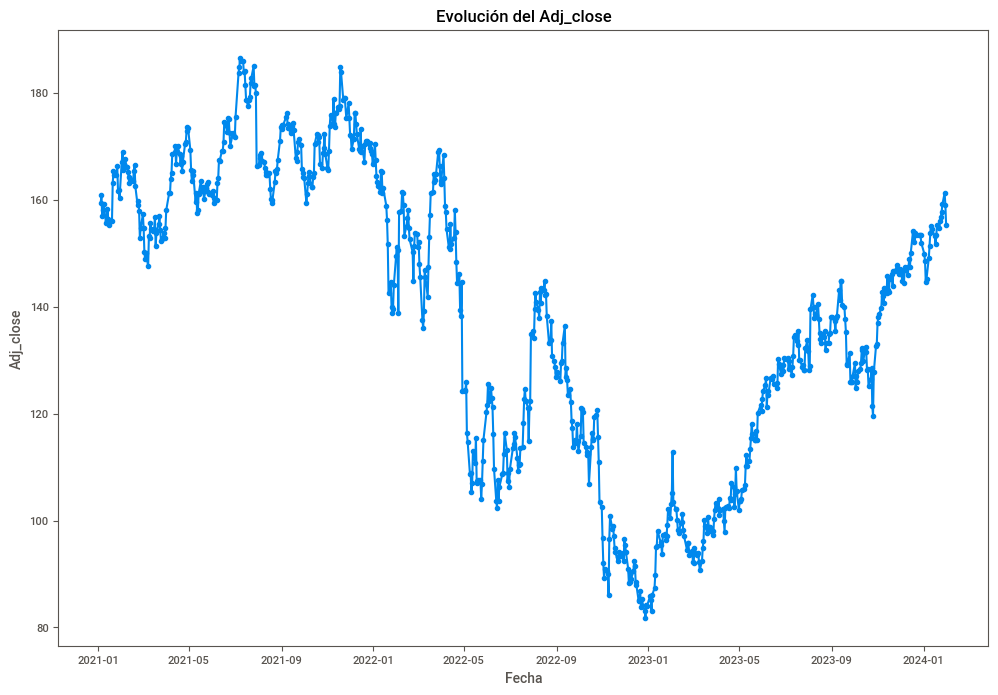

In [21]:
# Crear figura y eje
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos
ax.plot(adj_amz['Date'], adj_amz['Adj_close'], marker='o')

# Añadir título y etiquetas
ax.set_title('Evolución del Adj_close')
ax.set_xlabel('Fecha')
ax.set_ylabel('Adj_close')

# Añadir anotación en un punto específico
#ax.annotate('Punto destacado', xy=(pd.to_datetime('2021-01-06'), 156.919006),
#            xytext=(pd.to_datetime('2021-01-07'), 117.5),
#            arrowprops=dict(facecolor='black', arrowstyle='->'))

# Mostrar el gráfico
plt.show()

In [22]:
adj_amz.Adj_close.describe()

count    774.000000
mean     138.698511
std       27.212948
min       81.820000
25%      115.401375
50%      142.435005
75%      163.153381
max      186.570496
Name: Adj_close, dtype: float64

In [23]:
missing_values = df_amz_clean.isnull().sum()
missing_values

Date      0
Return    0
dtype: int64

In [24]:
df_amz_clean

,Date,Return
1,2021-01-05,0.010004
2,2021-01-06,-0.024897
3,2021-01-07,0.007577
4,2021-01-08,0.006496
5,2021-01-11,-0.021519
...,...,...
769,2024-01-25,0.005610
770,2024-01-26,0.008685
771,2024-01-29,0.013449
772,2024-01-30,-0.014015


## 6. Utilizando el paquete fbprophet, descompón la serie temporal de la columna Return en su tendencia y su parte estacional. 

Importing plotly failed. Interactive plots will not work.
13:34:21 - cmdstanpy - INFO - Chain [1] start processing
13:34:21 - cmdstanpy - INFO - Chain [1] done processing


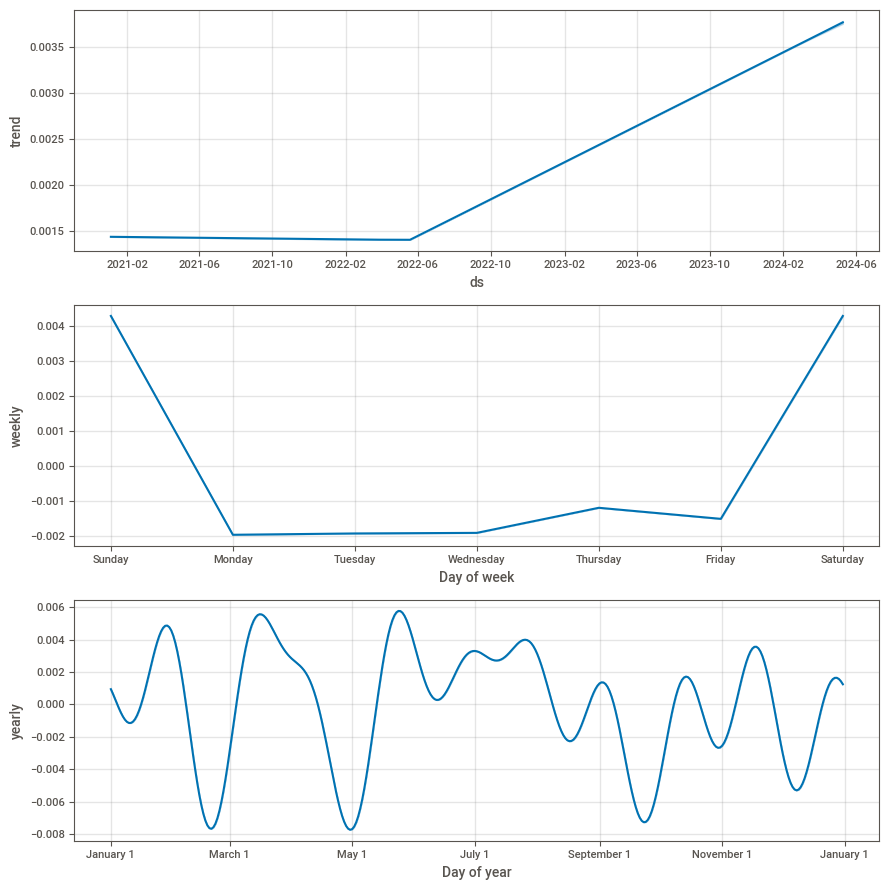

In [25]:
from prophet import Prophet

df_amz_clean.columns = ['ds', 'y']  # Cambiar los nombres de las columnas para que Prophet los entienda

# Crear y ajustar el modelo
model = Prophet()
model.fit(df_amz_clean)

# Hacer la descomposición
future = model.make_future_dataframe(periods=100)
forecast = model.predict(future)

# Plotear los componentes (tendencia y estacionalidad)
fig = model.plot_components(forecast)
plt.show()

In [26]:
df_amz_clean

,ds,y
1,2021-01-05,0.010004
2,2021-01-06,-0.024897
3,2021-01-07,0.007577
4,2021-01-08,0.006496
5,2021-01-11,-0.021519
...,...,...
769,2024-01-25,0.005610
770,2024-01-26,0.008685
771,2024-01-29,0.013449
772,2024-01-30,-0.014015


## 7.	Predice con ARIMA (0,1,2) y los datos de la columna Return la evolución de los stocks de Amazon.

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  773
Model:                 ARIMA(0, 1, 2)   Log Likelihood                1802.044
Date:                Fri, 31 May 2024   AIC                          -3598.088
Time:                        13:34:22   BIC                          -3584.141
Sample:                             0   HQIC                         -3592.721
                                - 773                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0001      0.152     -6.591      0.000      -1.297      -0.703
ma.L2          0.0002      0.030      0.006      0.995      -0.058       0.058
sigma2         0.0005   8.41e-05      6.477      0.0

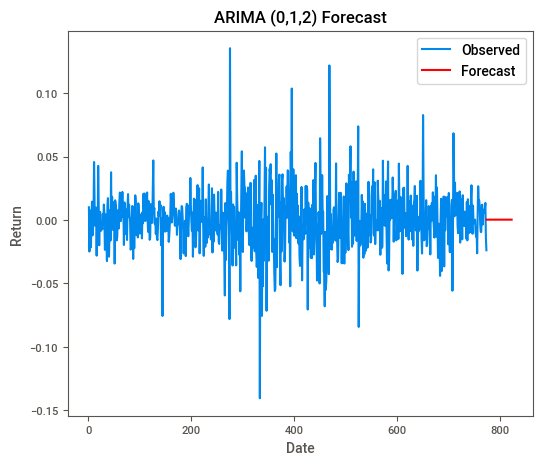

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  773
Model:                 ARIMA(0, 1, 2)   Log Likelihood                1802.044
Date:                Fri, 31 May 2024   AIC                          -3598.088
Time:                        13:34:22   BIC                          -3584.141
Sample:                             0   HQIC                         -3592.721
                                - 773                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0001      0.152     -6.591      0.000      -1.297      -0.703
ma.L2          0.0002      0.030      0.006      0.995      -0.058       0.058
sigma2         0.0005   8.41e-05      6.477      0.0

In [27]:
from statsmodels.tsa.arima.model import ARIMA
import warnings

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot

# Ajustar el modelo ARIMA (0,1,2)
model = ARIMA(df_amz_clean['y'], order=(0,1,2))
model_fit = model.fit()

# Realizar la predicción
forecast_steps = 50  # Número de pasos a predecir
forecast = model_fit.forecast(steps=forecast_steps)

# Imprimir resumen del modelo y las predicciones
print(model_fit.summary())
print(forecast)

# Graficar los resultados
plt.figure(figsize=(6, 5))
plt.plot(df_amz_clean['y'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA (0,1,2) Forecast')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# summary of fit model
print(model_fit.summary())
# line plot of residuals
#residuals = DataFrame(model_fit.resid)
#residuals.plot()
#pyplot.show()
# density plot of residuals
#residuals.plot(kind='kde')
#pyplot.show()
# summary stats of residuals
#print(residuals.describe())

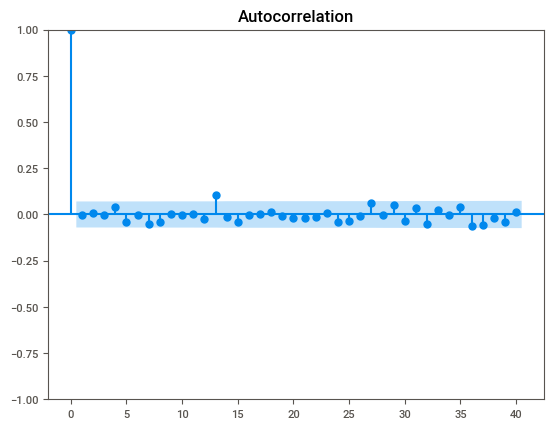

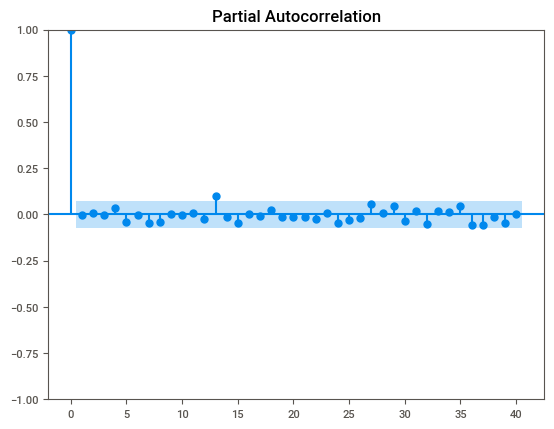

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_amz_clean['y'], lags=40)
plot_pacf(df_amz_clean['y'], lags=40)
plt.show()

In [29]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df_amz_clean['y'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-3604.915, Time=0.28 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-3612.416, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-3610.418, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-3610.417, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3614.335, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-3608.659, Time=0.09 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 0.477 seconds


In [30]:
df_amz_clean

,ds,y
1,2021-01-05,0.010004
2,2021-01-06,-0.024897
3,2021-01-07,0.007577
4,2021-01-08,0.006496
5,2021-01-11,-0.021519
...,...,...
769,2024-01-25,0.005610
770,2024-01-26,0.008685
771,2024-01-29,0.013449
772,2024-01-30,-0.014015


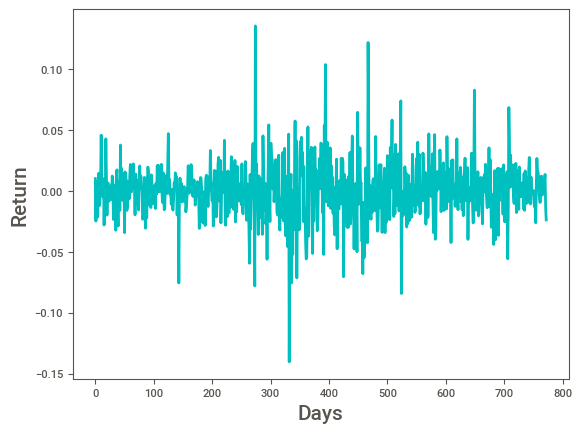

13:34:24 - cmdstanpy - INFO - Chain [1] start processing
13:34:24 - cmdstanpy - INFO - Chain [1] done processing


          ds      yhat  yhat_lower  yhat_upper
0 2023-01-01  0.007494   -0.022638    0.039232
1 2023-01-01  0.007494   -0.020713    0.037629
2 2023-01-01  0.007494   -0.023539    0.039740
3 2023-01-01  0.007494   -0.018788    0.037428
4 2023-01-01  0.007494   -0.022364    0.034687


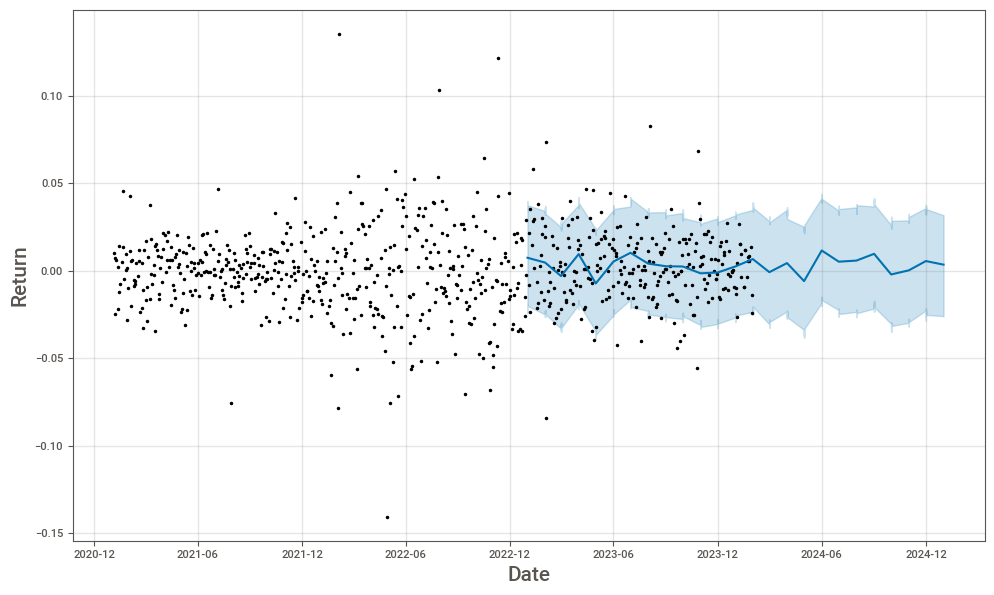

In [31]:
df = df_amz_clean
n_days = np.arange(len(df))

# plot de la serie temporal
plt.plot(n_days, df['y'],'c-', linewidth = 2)
plt.ylabel("Return", fontsize = 15)
plt.xlabel("Days", fontsize = 15)
plt.show()

from prophet import Prophet

#define el rango de tiempo a predecir
start_date, end_date = "2023-1-01", "2025-01-01"
# define el modelo
model_fc = Prophet()
# entrena el modelo
model_fc.fit(df)
# define el periodo para predecir
future = list()

date_generated = pd.period_range(start=start_date, end=end_date, freq='d')
future = list()
future=date_generated.strftime("%Y%m")
future = future.to_list()
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'], format='%Y%m')
# hacemos el forecast
forecast_fc = model_fc.predict(future)
# summarize the forecast
print(forecast_fc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_fc.plot(forecast_fc)
plt.ylabel("Return", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
pyplot.show()

In [32]:
df_amz_clean

,ds,y
1,2021-01-05,0.010004
2,2021-01-06,-0.024897
3,2021-01-07,0.007577
4,2021-01-08,0.006496
5,2021-01-11,-0.021519
...,...,...
769,2024-01-25,0.005610
770,2024-01-26,0.008685
771,2024-01-29,0.013449
772,2024-01-30,-0.014015


In [33]:
df_amz_clean_se = df_amz_clean.y.dropna()
df_amz_clean_se

1      0.010004
2     -0.024897
3      0.007577
4      0.006496
5     -0.021519
         ...   
769    0.005610
770    0.008685
771    0.013449
772   -0.014015
773   -0.023899
Name: y, Length: 773, dtype: float64

In [34]:
df_amz_clean

,ds,y
1,2021-01-05,0.010004
2,2021-01-06,-0.024897
3,2021-01-07,0.007577
4,2021-01-08,0.006496
5,2021-01-11,-0.021519
...,...,...
769,2024-01-25,0.005610
770,2024-01-26,0.008685
771,2024-01-29,0.013449
772,2024-01-30,-0.014015


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(0, 1, 2)   Log Likelihood                  23.656
Date:                Fri, 31 May 2024   AIC                            -41.311
Time:                        13:34:24   BIC                            -40.720
Sample:                             0   HQIC                           -42.588
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1344      8.195     -0.016      0.987     -16.197      15.928
ma.L2         -0.8312      7.145     -0.116      0.907     -14.835      13.172
sigma2         0.0002      0.002      0.124      0.9

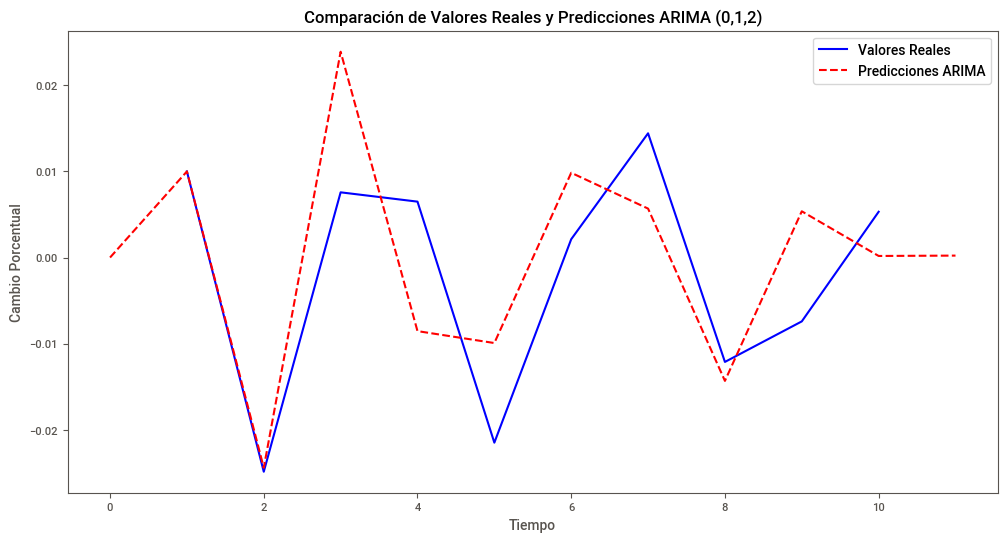

In [35]:
# Calcular el cambio porcentual
ts = df_amz_clean.y.head(10)
ts_pct_change = ts.dropna()

# Ajustar el modelo ARIMA (aquí se asume p=1, d=0, q=1 como ejemplo)
model = ARIMA(ts_pct_change, order=(0, 1, 2))
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

# Hacer predicciones
predictions = model_fit.predict(start=0, end=len(ts_pct_change)+1)

# Crear un DataFrame para comparar predicciones y valores reales
comparison_df = pd.DataFrame({
    'Real': ts_pct_change,
    'Predicted': predictions
})

# Graficar los valores reales y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Real'], label='Valores Reales', color='blue')
plt.plot(comparison_df['Predicted'], label='Predicciones ARIMA', color='red', linestyle='--')
plt.title('Comparación de Valores Reales y Predicciones ARIMA (0,1,2)')
plt.xlabel('Tiempo')
plt.ylabel('Cambio Porcentual')
plt.legend()
plt.show()

In [36]:
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
df_amz_clean.columns = ['Date', 'Return'] 
df_amz_clean.set_index('Date', inplace=True)
df_amz_clean

,Return
Date,
2021-01-05,0.010004
2021-01-06,-0.024897
2021-01-07,0.007577
2021-01-08,0.006496
2021-01-11,-0.021519
...,...
2024-01-25,0.005610
2024-01-26,0.008685
2024-01-29,0.013449


In [37]:
train_data, test_data = df_amz_clean[0:int(len(df_amz_clean)*0.9)], df_amz_clean[int(len(df_amz_clean)*0.9):]

train_arima = train_data['Return']
test_arima = test_data['Return']

history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(0,1,2))
model_fit = model.fit()
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])

In [38]:
# rolling forecasts

for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
    warnings.filterwarnings('ignore')

In [39]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 0.0004883712372787762
MAE: 0.01584183932364207
RMSE: 0.022099122997955738


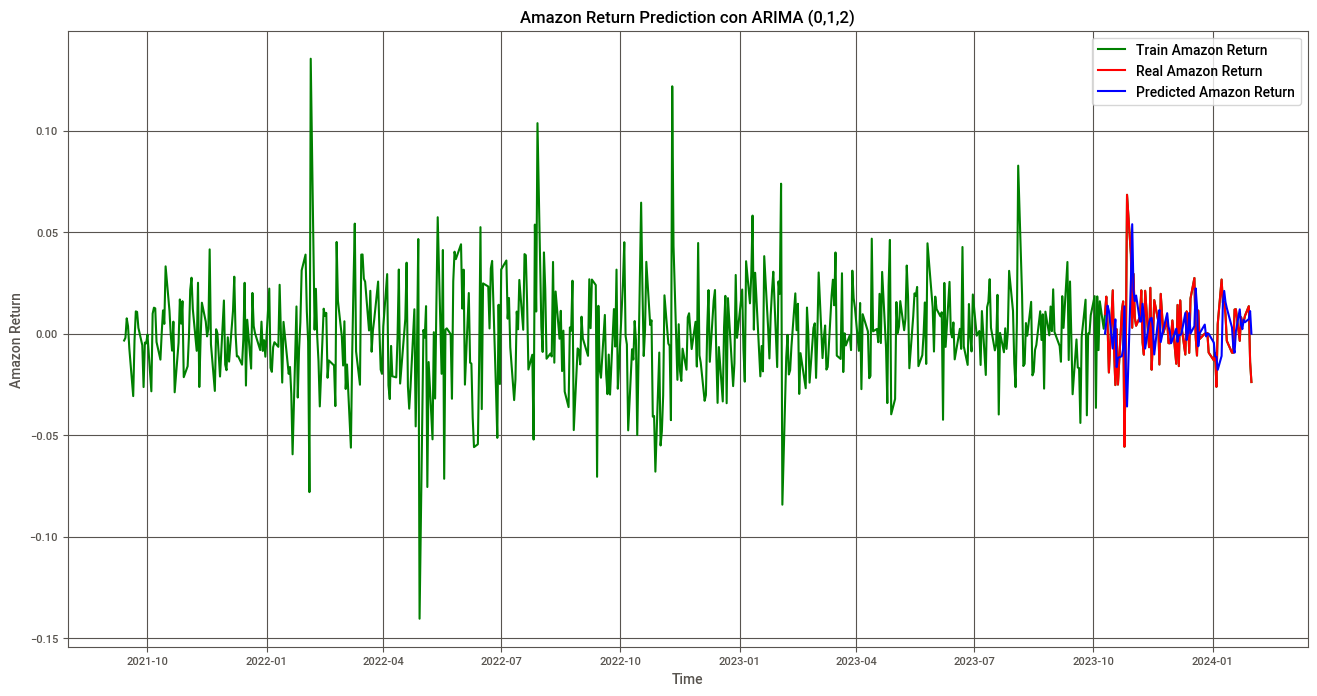

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df_amz_clean.index[-600:], df_amz_clean['Return'].tail(600), color='green', label = 'Train Amazon Return')
plt.plot(test_data.index, y, color = 'red', label = 'Real Amazon Return')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Amazon Return')
plt.title('Amazon Return Prediction con ARIMA (0,1,2)')
plt.xlabel('Time')
plt.ylabel('Amazon Return')
plt.legend()
plt.grid(True)
plt.savefig('../reports/arima_model.pdf')
plt.show()

## 8. Investiga sobre los factores de Fama French 3
## https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html y descarga dichos factores para las fechas acordadas.
## •	¿Qué significan los factores Rm-Rf, SMB y HML? ¿Cómo sus variaciones afectan al retorno de las acciones
## •	Calcula y analiza la regresión OLS para los datos de la columna Return de Amazon en función de los factores FF3. ¿Cómo afecta cada factor a los retornos de la acción de Amazon?


In [41]:
import statsmodels.api as sm

# Cargar los datos de los factores Fama-French
ff_factors = pd.read_csv('../data/F-F_Research_Data_Factors_daily.CSV', index_col=0, sep=';')

start_date = "2021-01-01"
end_date = "2024-02-01"

ff_factors

,Date,Mkt-RF,SMB,HML,RF
tk,,,,,
NaN,19260701,0.10,-0.25,-0.27,0.009
NaN,19260702,0.45,-0.33,-0.06,0.009
NaN,19260706,0.17,0.30,-0.39,0.009
NaN,19260707,0.09,-0.58,0.02,0.009
NaN,19260708,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
NaN,20240322,-0.23,-0.87,-0.53,0.021
NaN,20240325,-0.26,-0.24,0.88,0.021
NaN,20240326,-0.26,0.09,-0.13,0.021


In [42]:
ff_factors['Date'] = pd.to_datetime(ff_factors['Date'], format='%Y%m%d')
ff_factors

,Date,Mkt-RF,SMB,HML,RF
tk,,,,,
NaN,1926-07-01,0.10,-0.25,-0.27,0.009
NaN,1926-07-02,0.45,-0.33,-0.06,0.009
NaN,1926-07-06,0.17,0.30,-0.39,0.009
NaN,1926-07-07,0.09,-0.58,0.02,0.009
NaN,1926-07-08,0.21,-0.38,0.19,0.009
...,...,...,...,...,...
NaN,2024-03-22,-0.23,-0.87,-0.53,0.021
NaN,2024-03-25,-0.26,-0.24,0.88,0.021
NaN,2024-03-26,-0.26,0.09,-0.13,0.021


In [43]:
# Filtrar el DataFrame entre las dos fechas
filtered_ff_factors = ff_factors.loc[(ff_factors['Date'] >= start_date) & (ff_factors['Date'] <= end_date)]

print("DataFrame filtrado:")
print(filtered_ff_factors)

DataFrame filtrado:
          Date  Mkt-RF   SMB   HML     RF
tk                                       
NaN 2021-01-04   -1.41  0.22  0.58  0.000
NaN 2021-01-05    0.86  1.23  0.49  0.000
NaN 2021-01-06    0.79  2.14  3.94  0.000
NaN 2021-01-07    1.76  0.33 -0.83  0.000
NaN 2021-01-08    0.51 -0.75 -1.37  0.000
..         ...     ...   ...   ...    ...
NaN 2024-01-26   -0.02  0.40 -0.27  0.022
NaN 2024-01-29    0.86  1.07 -0.59  0.022
NaN 2024-01-30   -0.13 -1.26  0.84  0.022
NaN 2024-01-31   -1.74 -0.92 -0.30  0.022
NaN 2024-02-01    1.23  0.63 -1.36  0.021

[775 rows x 5 columns]


In [44]:
df_amz_clean = df_amz_clean.reset_index()
df_amz_clean

,Date,Return
0,2021-01-05,0.010004
1,2021-01-06,-0.024897
2,2021-01-07,0.007577
3,2021-01-08,0.006496
4,2021-01-11,-0.021519
...,...,...
768,2024-01-25,0.005610
769,2024-01-26,0.008685
770,2024-01-29,0.013449
771,2024-01-30,-0.014015


In [45]:
# Cargar los retornos de Amazon
df_amz_clean.columns = ['Date', 'Return']

# Alinear las fechas y combinar los datos
ff_factors_amz = pd.merge(filtered_ff_factors, df_amz_clean, on='Date', how='inner') 

print(ff_factors_amz)

          Date  Mkt-RF   SMB   HML     RF    Return
0   2021-01-05    0.86  1.23  0.49  0.000  0.010004
1   2021-01-06    0.79  2.14  3.94  0.000 -0.024897
2   2021-01-07    1.76  0.33 -0.83  0.000  0.007577
3   2021-01-08    0.51 -0.75 -1.37  0.000  0.006496
4   2021-01-11   -0.51  0.26  1.26  0.000 -0.021519
..         ...     ...   ...   ...    ...       ...
768 2024-01-25    0.46  0.04  0.56  0.022  0.005610
769 2024-01-26   -0.02  0.40 -0.27  0.022  0.008685
770 2024-01-29    0.86  1.07 -0.59  0.022  0.013449
771 2024-01-30   -0.13 -1.26  0.84  0.022 -0.014015
772 2024-01-31   -1.74 -0.92 -0.30  0.022 -0.023899

[773 rows x 6 columns]


In [46]:
# Definir la variable dependiente (retorno de Amazon) y las independientes (factores FF3)
X = ff_factors_amz[['Mkt-RF', 'SMB', 'HML']]
y = ff_factors_amz['Return']

# Agregar una constante (intercepto) a las variables independientes
X = sm.add_constant(X)

# Ajustar el modelo OLS
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Return   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     361.3
Date:                Fri, 31 May 2024   Prob (F-statistic):          2.38e-146
Time:                        13:34:26   Log-Likelihood:                 2148.1
No. Observations:                 773   AIC:                            -4288.
Df Residuals:                     769   BIC:                            -4270.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.594e-05      0.001      0.085      0.9